In [1]:
from api import *
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

clean_birmingham_report_df = pd.read_feather('image_time_traffic_reports/clean_birmingham_report_df')
clean_manc_report_df = pd.read_feather('image_time_traffic_reports/clean_manc_report_df')
clean_cam_report_df = pd.read_feather('image_time_traffic_reports/clean_cam_report_df')
clean_thorpe_report_df = pd.read_feather('image_time_traffic_reports/clean_thorpe_report_df')
clean_epping_report_df = pd.read_feather('image_time_traffic_reports/clean_epping_report_df')
clean_bristol_df = pd.read_feather('image_time_traffic_reports/clean_bristol_df')
clean_train_report_df = pd.concat([clean_birmingham_report_df, clean_manc_report_df, clean_cam_report_df, clean_thorpe_report_df, clean_epping_report_df, clean_bristol_df]).reset_index(drop = True)

In [65]:
clean_birmingham_report_df.head()

,site_name,site_id,report_date,time_period_ending,time_interval,0-520cm,521-660cm,661-1160cm,1160+cm,avg_mph,total_volume,timestamp,0-520cm_normalised,521-660cm_normalised,661-1160cm_normalised,1160+cm_normalised,total_volume_normalised
0,M42/6482L,175,2021-06-15T00:00:00,00:14:00,0,0,0,0,0,0,0,2021-06-15 00:14:00,0.0,0.0,0.0,0.0,0.0
1,M42/6482L,175,2021-06-15T00:00:00,00:29:00,1,0,0,0,0,0,0,2021-06-15 00:29:00,0.0,0.0,0.0,0.0,0.0
2,M42/6482L,175,2021-06-15T00:00:00,00:44:00,2,0,0,0,0,0,0,2021-06-15 00:44:00,0.0,0.0,0.0,0.0,0.0
3,M42/6482L,175,2021-06-15T00:00:00,00:59:00,3,0,0,0,0,0,0,2021-06-15 00:59:00,0.0,0.0,0.0,0.0,0.0
4,M42/6482L,175,2021-06-15T00:00:00,01:14:00,4,0,0,0,0,0,0,2021-06-15 01:14:00,0.0,0.0,0.0,0.0,0.0


In [26]:
clean_birmingham_report_df.site_id.unique()

array(['175', '561', '1102', '1105', '1608', '1747', '1926', '2017',
       '2330', '2951', '3103', '4403', '4458', '4604', '5297', '6891',
       '9092', '9093', '9490', '9491', '10337', '10373', '10398', '10429',
       '10430', '10445', '10560', '10701', '10705', '10706', '10712',
       '10715', '10722', '10745', '10766', '10771', '10790', '18190',
       '18195', '18198', '18199', '18201', '18202', '18208', '18209',
       '18211', '18212', '18217', '18224', '18227', '18229', '18230'],
      dtype=object)

In [27]:
sites = '175', '561', '1102', '1105', '1608', '1747', '1926', '2017', '2330', '2951', '3103', '4403'

In [28]:
small_report_df = clean_birmingham_report_df[clean_birmingham_report_df.site_id.isin(sites)]

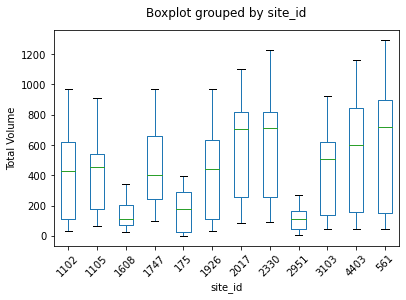

In [33]:
fig, ax = plt.subplots()
small_report_df.boxplot(column='total_volume', by = 'site_id', ax=ax, grid=False, rot=45)
ax.set_title('')
ax.set_ylabel('Total Volume')
plt.savefig('boxplt',dpi=300,  bbox_inches="tight")
plt.show()

In [39]:
long_birmm = pd.read_feather('high_quality_traffic_reports/clean_birmingham_report_df_norm')

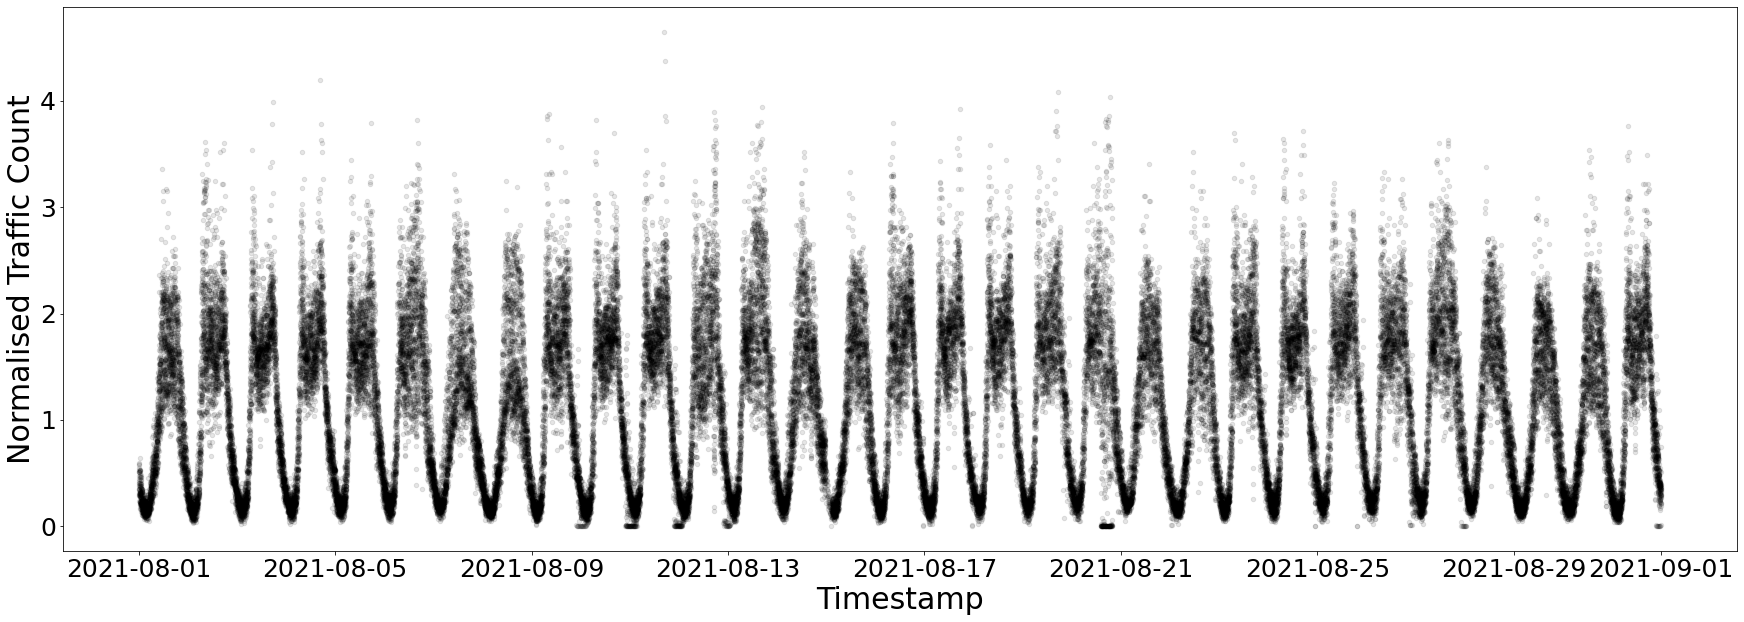

In [63]:
fig, ax = plt.subplots()
filterd_report = long_birmm.loc[long_birmm['timestamp'].dt.to_period('M')  == '2021-08']
filterd_report.plot('timestamp','total_volume_normalised', figsize = (30,10), kind = 'scatter', alpha=0.1, c='black', ax = ax)
ax.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel('Timestamp', size = 30)
plt.ylabel('Normalised Traffic Count', size = 30)
plt.savefig('normalised-traffic-count',dpi=300,  bbox_inches="tight")
plt.show()